<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Обучим-модели-с-помощью-Pipeline" data-toc-modified-id="Обучим-модели-с-помощью-Pipeline-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обучим модели с помощью Pipeline</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия(LogisticRegression)" data-toc-modified-id="Логистическая-регрессия(LogisticRegression)-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Логистическая регрессия(LogisticRegression)</a></span></li><li><span><a href="#Решающее-дерево(DecisionTreeClassifier)" data-toc-modified-id="Решающее-дерево(DecisionTreeClassifier)-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Решающее дерево(DecisionTreeClassifier)</a></span></li><li><span><a href="#Случайный-лес(RandomForestClassifier)" data-toc-modified-id="Случайный-лес(RandomForestClassifier)-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Случайный лес(RandomForestClassifier)</a></span></li></ul></li><li><span><a href="#Протестируем-лучшую-модель" data-toc-modified-id="Протестируем-лучшую-модель-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Протестируем лучшую модель</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Этап-1.-Подготовка-данных." data-toc-modified-id="Этап-1.-Подготовка-данных.-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Этап 1. Подготовка данных.</a></span></li><li><span><a href="#Этап-2.-Обучение-моделей" data-toc-modified-id="Этап-2.-Обучение-моделей-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Этап 2. Обучение моделей</a></span></li><li><span><a href="#Этап-3.-Тестирование" data-toc-modified-id="Этап-3.-Тестирование-4.0.3"><span class="toc-item-num">4.0.3&nbsp;&nbsp;</span>Этап 3. Тестирование</a></span></li></ul></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

###### Цель исследования:
Построить модель для определения токсичности комментариев.

###### Ход исследования:
1. Открыть и изучить предоставленные данные и подготовить их к исследованию.
2. Подготовить выборки для обучения моделей. 
3. Обучить разные модели с учетом подбора гиперпараметров.
4. Проанализировать качество моделей.
5. Проверить лучшую модель на тестовых данных.

## Подготовка

Импортируем все необходимые библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

import nltk 
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords as nltk_stopwords
nltk.download('stopwords')
stop_words = set(nltk_stopwords.words('english'))
nltk.download('averaged_perceptron_tagger')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


ОТкроем и изучим данные.

In [2]:
data = pd.read_csv('/datasets/toxic_comments.csv')
display(data.head())
display(data.describe())
data.info()

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


,Unnamed: 0,toxic
count,159292.000000,159292.000000
mean,79725.697242,0.101612
std,46028.837471,0.302139
min,0.000000,0.000000
25%,39872.750000,0.000000
50%,79721.500000,0.000000
75%,119573.250000,0.000000
max,159450.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


Видим, что данные содержат почти 160 тысяч строк и 3 столбца. Пропуски в данных отсутствуют. Столбец Unnamed: 0 не содержит важной для нас информации, поэтому удалим его.

In [3]:
data = data.drop('Unnamed: 0', axis=1)
data.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


Проверим данные на дубликаты.

In [4]:
data.duplicated().sum()

0

Перед нами задача классификации, поэтому нужно проверить баланс классов.

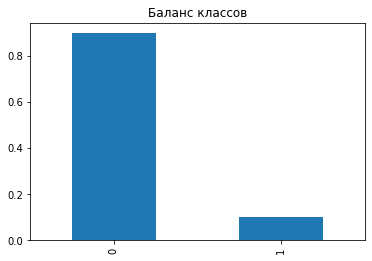

In [5]:
data['toxic'].value_counts(normalize=True).plot(kind='bar')
plt.title('Баланс классов');

На графике отчетливо видно, что 0 класс преобладает, соответственно нужно будет поработать с этим дисбалансом.

Также видно, что комментарии в столбце text не подготовлены, в них присутствуют знаки препинания, разделители строк, данные не приведены к единому регистру. Также необходимо лемматизировать текст и удалить стоп-слова. Напишем функцию, которая очистит и подготовит датасет к дальнейшей работе.

In [6]:
# напишем функцию по очистке текста
def clear_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z']", ' ', text)   
    text = ' '.join(text.split())
    return text

In [7]:
data['text'] = data['text'].apply(clear_text) 
data.head()

,text,toxic
0,explanation why the edits made under my userna...,0
1,d'aww he matches this background colour i'm se...,0
2,hey man i'm really not trying to edit war it's...,0
3,more i can't make any real suggestions on impr...,0
4,you sir are my hero any chance you remember wh...,0


In [8]:
# напишем функцию для POS-тегирования - определения части речи 
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,               
                "N": wordnet.NOUN,              
                "V": wordnet.VERB,              
                "R": wordnet.ADV                
               }  
    return tag_dict.get(tag, wordnet.NOUN)

# инициализируем лемматайзер 
lemmatizer = WordNetLemmatizer()

# напишем функцию лемматизации
def lemm_text(text):
    text = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(text)]
    return text


In [9]:
data['text'] = data['text'].apply(lemm_text)
data.head()

,text,toxic
0,"[explanation, why, the, edits, make, under, my...",0
1,"[d'aww, he, match, this, background, colour, i...",0
2,"[hey, man, i, 'm, really, not, try, to, edit, ...",0
3,"[more, i, ca, n't, make, any, real, suggestion...",0
4,"[you, sir, be, my, hero, any, chance, you, rem...",0


In [10]:
data['text'] = data.text.apply(' '.join)
data.head()

,text,toxic
0,explanation why the edits make under my userna...,0
1,d'aww he match this background colour i 'm see...,0
2,hey man i 'm really not try to edit war it 's ...,0
3,more i ca n't make any real suggestion on impr...,0
4,you sir be my hero any chance you remember wha...,0


In [11]:
# снова проверим данные на дубликаты
data.duplicated().sum()

1261

In [12]:
# удалим появившиеся дубликаты
data = data.drop_duplicates()

In [13]:
data.duplicated().sum()

0

Вывод: данные загружены и изучены - в ходе проверки не обнаружились пропуски или дубликаты. Но был выявлен дисбаланс классов, с которым предстоит поработать. Текстовые комментарии предобработаны - данные очистили от знаков препинания, разделителей, привели к нижнему регистру, лемматизировали, удалили стоп-слова. Данные готовы к дальнейшей работе с моделями.

## Обучение

1. Подготовим признаки и таргет. Разделим данные на обучающую и тестовую выборки в соотношении 9:1

In [14]:
features = data.drop(['toxic'], axis=1) 
target = data['toxic']

display(features.shape)
display(target.shape)

(158031, 1)

(158031,)

In [15]:
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                              target, 
                                                                              test_size=0.1, 
                                                                              random_state=12345)

display(features_train.shape)
display(target_train.shape)
display(features_test.shape)
display(target_test.shape)

(142227, 1)

(142227,)

(15804, 1)

(15804,)

### Обучим модели с помощью Pipeline 

#### Логистическая регрессия(LogisticRegression)

In [16]:
pipe_lr = Pipeline([('vect', TfidfVectorizer(stop_words=stop_words)),
                   ('lr', LogisticRegression(random_state=12345))])

param_grid = {
"vect__max_features": (30000, 50000),
"lr__C": range (5,15,5)
}

grid = GridSearchCV(pipe_lr, param_grid, cv=3, scoring = 'f1')

grid.fit(features_train['text'], target_train)


print("Наилучшие параметры:", grid.best_params_)
print("f1:", grid.best_score_ )

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Наилучшие параметры: {'lr__C': 10, 'vect__max_features': 30000}
f1: 0.7692706970441358


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Решающее дерево(DecisionTreeClassifier)

In [17]:
pipe_dtc = Pipeline([('vect', TfidfVectorizer(stop_words=stop_words, max_features=30000)),
                   ('dtc', DecisionTreeClassifier(random_state=12345))])

param_grid_dtc = {
"dtc__max_depth": range (5,20)
}

grid_dtc = GridSearchCV(pipe_dtc, param_grid_dtc, cv=3, scoring = 'f1')

grid_dtc.fit(features_train['text'], target_train)


print("Наилучшие параметры:", grid_dtc.best_params_)
print("f1:", grid_dtc.best_score_ )


Наилучшие параметры: {'dtc__max_depth': 19}
f1: 0.6515808339095549


#### Случайный лес(RandomForestClassifier)

In [18]:
pipe_rfc = Pipeline([('vect', TfidfVectorizer(stop_words=stop_words, max_features=30000)),
                   ('rfc', RandomForestClassifier(random_state=12345))])

param_grid_rfc = {
"rfc__n_estimators": range (50,100,10)
}

grid_rfc = GridSearchCV(pipe_rfc, param_grid_rfc, cv=3, scoring = 'f1')

grid_rfc.fit(features_train['text'], target_train)


print("Наилучшие параметры:", grid_rfc.best_params_)
print("f1:", grid_rfc.best_score_ )


Наилучшие параметры: {'rfc__n_estimators': 90}
f1: 0.7313353216840989


### Протестируем лучшую модель

Наиболее высокий результат показала модель логистической регресии. Проверим ее на тестовой выборке.

In [19]:
best_model = Pipeline([('vect', TfidfVectorizer(stop_words=stop_words, 
                                                max_features=grid.best_params_["vect__max_features"])),
                   ('lr', LogisticRegression(random_state=12345, C=grid.best_params_["lr__C"]))])

best_model.fit(features_train['text'], target_train)
predictions_test = best_model.predict(features_test['text'])

print('F1 на тестовой выборке', f1_score(target_test, predictions_test))


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 на тестовой выборке 0.775320970042796


## Выводы

В результате исследования наилучшей моделью оказалась логистическая регрессия, которая показала качество на тесте F1 = 0.77

## Общий вывод

#### Этап 1. Подготовка данных.
В ходе этого этапа был открыт файл и изучены данные. Была проведена проверка на пропуски и дубликаты. В ходе подготовки данных был обнаружен дисбаланс классов. Также тексты комментариев были предобработаны - очищены, лемматизированы, удалены стоп-слова.

#### Этап 2. Обучение моделей
Для обучения моделей был использован pipeline из векторайзера и модели и подбор параметров с помощью GridSearchCV.  

Были обучены три модели -  Логистическая регрессия, Дерево решений и Модель случайного леса - и были найдены наиболее подходящие гиперпараметры, благодаря которым модели выдавали наилучшее качество. Также качество моделей проверили на тестовой выборке.

#### Этап 3. Тестирование
Наилучший результат показала модель Логистической регресии.
Модель была протестирована, и показала значение F1 0.77, что удоблетворяет условиям заказчика.

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Модели обучены
- [ ]  Значение метрики *F1* не меньше 0.75
- [ ]  Выводы написаны